prediction :  [0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0]
y_test :      [1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0]
accuracy :  0.9
<class 'numpy.ndarray'>


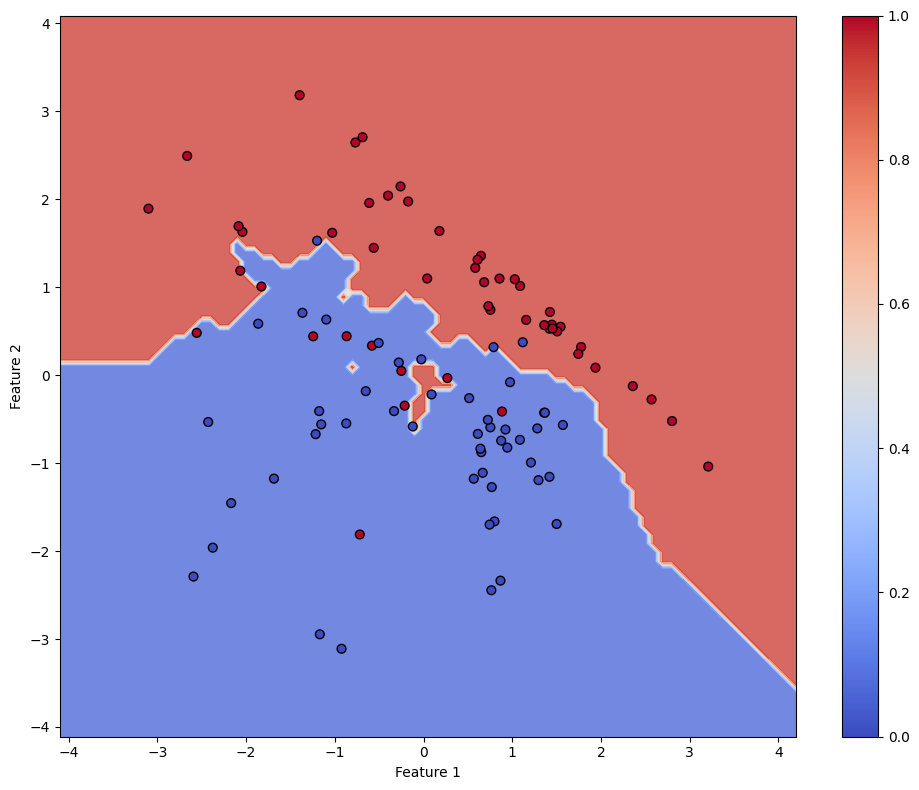

In [ ]:
import numpy as np
from sklearn.neighbors import KDTree
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score
import time

# kod jest inspiracją z youtube - https://www.youtube.com/watch?v=rTEtEy5o3X0

def distp(a,b):
    return np.sqrt(np.sum((a-b)**2))

def distp2(a,b):
    n_sampes_a = a.shape[0]
    n_samples_b = b.shape[0]
    d = np.zeros((n_sampes_a,n_samples_b))
    for i in range(n_sampes_a):
        for j in range(n_samples_b):
            diff = a[i] - b[j]
            d[i,j] = np.sqrt(diff.dot(diff))
    return d

class KNN:
    def __init__(self,n_neighbors=1,use_KDTree=False):
        self.n_neighbors = n_neighbors
        self.use_KDTree = use_KDTree

    def fit(self,X,y):
        self.x_train = X
        self.y_train = y

    def predict(self,X):
        predictions = []
        for x in X:
            predictions.append(self._predict(x))
        return np.array(predictions)

    def score(self,x,y):
        acc = np.sum(predictions == y_test) / len(y_test)
        return acc
    
    def _predict(self,x):
        distances = [distp(x,x_train) for x_train in self.x_train]
        np.argsort(distances)[:self.n_neighbors]
        indices = np.argsort(distances)[:self.n_neighbors]

        labels = [self.y_train[i] for i in indices]
        most_common = Counter(labels).most_common()
        return most_common[0][0]
    
# iris = datasets.load_iris()
# X,y = iris.data, iris.target
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# plt.figure()
# plt.scatter(X[:,2],X[:,3],c=y)
# plt.show()

# clf = KNN(n_neighbors=5)
# clf.fit(X_train,y_train)
# predictions = clf.predict(X_test)

# print(predictions)

# print("Accuracy : ", clf.score(X_test,y_test))

# 3   
X,y = datasets.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=3
)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = KNN(n_neighbors=5)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print("prediction : ", predictions)
print("y_test :     ", y_test)
print("accuracy : ", clf.score(X_test,y_test))

plt.figure(figsize=(10,8))

xmin,xmax = X[:,0].min() -1,X[:,0].max() + 1

ymin,ymax = X[:,1].min() -1,X[:,1].max() + 1


h = 0.1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(type(Z))
# Z = np.array(Z)
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.coolwarm)

scatter = plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',s=40,cmap=plt.cm.coolwarm)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Add a colorbar
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

original data accuracy :  0.9


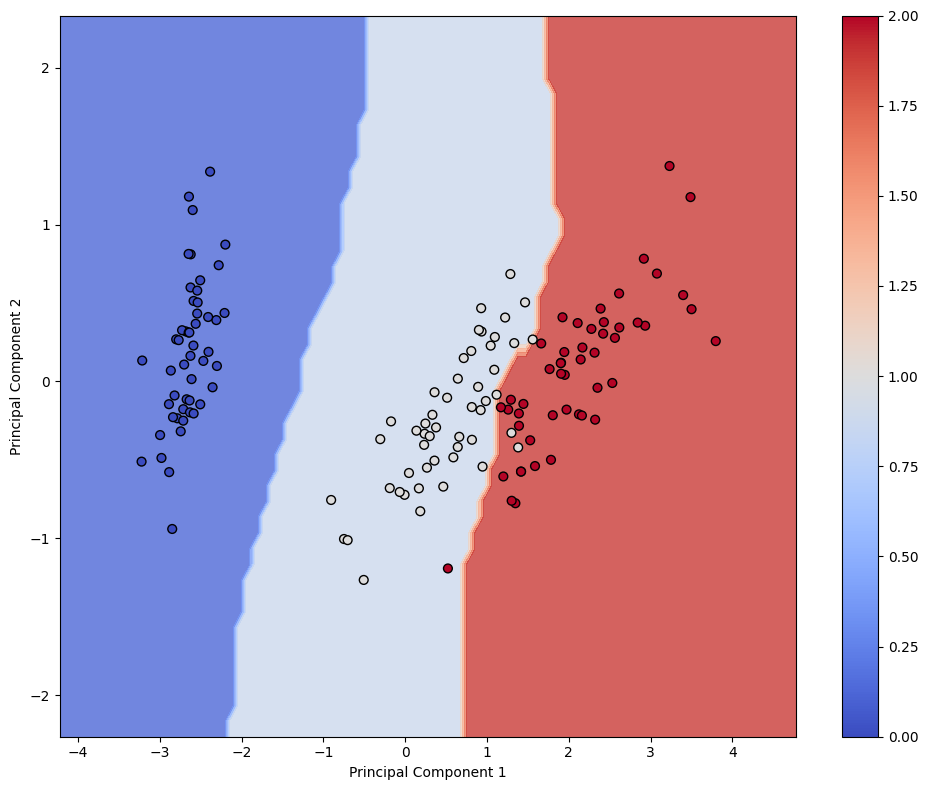

In [3]:
iris = datasets.load_iris()
X_iris,Y_iris = iris.data,iris.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
clf = KNN(n_neighbors=5)
clf.fit(X_iris,Y_iris)
acc = clf.score(X_iris,Y_iris)
print("original data accuracy : ", acc)
plt.figure(figsize=(10,8))

xmin,xmax = X_pca[:,0].min() -1,X_pca[:,0].max() + 1

ymin,ymax = X_pca[:,1].min() -1,X_pca[:,1].max() + 1

h = 0.1
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
mesh_points_pca = np.c_[xx.ravel(),yy.ravel()]
mesh_points_original = pca.inverse_transform(mesh_points_pca)

Z = clf.predict(mesh_points_original)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_iris, edgecolors='k', s=40, cmap=plt.cm.coolwarm)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.colorbar(scatter)

plt.tight_layout()
plt.show()



In [4]:
start_time = time.time()
knn_regular = KNN(n_neighbors=5, use_KDTree=False)
knn_regular.fit(X_iris, Y_iris)
_ = knn_regular.predict(X_iris)
time_regular = time.time() - start_time

start_time = time.time()
knn_kdtree = KNN(n_neighbors=5, use_KDTree=True)
knn_kdtree.fit(X_iris, Y_iris)
_ = knn_kdtree.predict(X_iris)
time_kdtree = time.time() - start_time

print(f"time without KD-Tree: {time_regular:.5f} seconds")
print(f"time with KD-Tree: {time_kdtree:.5f} seconds")
print(f"speedup : {time_regular/time_kdtree:.2f}x")

time without KD-Tree: 0.18764 seconds
time with KD-Tree: 0.17501 seconds
speedup : 1.07x
